# Importations

In [1]:
import scipy.io
import os
import h5py
import numpy as np
from scipy.signal import find_peaks, savgol_filter
import matplotlib.pyplot as plt
# from scipy.stats import sem
from scipy.stats import wilcoxon
import pandas as pd
import json
import jdata as jd
import re
import pickle

from nbconvert.preprocessors import ExecutePreprocessor
from nbconvert import NotebookExporter
import nbformat
from tqdm import tqdm  # Importer tqdm pour la barre de progression

import shutil

import random

from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from matplotlib.gridspec import GridSpec
from PIL import Image

from aquarel import load_theme





from MyModule import *

In [2]:
# qt for popup window (savable as pdf, svg...), inline for inline plot, notebook for interactive plot, widget for interactive plot
%matplotlib widget 
plt.ioff()

# Functions

## Folder browser

In [3]:
# import tkinter as tk
# from tkinter import filedialog

# def open_select_folders_dialog():
#     class SelectFoldersDialog:
#         def __init__(self, master):
#             self.master = master
#             self.selected_folders = []

#             self.label = tk.Label(master, text="Sélectionnez les dossiers :")
#             self.label.pack()

#             self.add_button = tk.Button(master, text="Ajouter un dossier", command=self.add_folder)
#             self.add_button.pack()

#             self.confirm_button = tk.Button(master, text="Confirmer la sélection", command=self.confirm_selection)
#             self.confirm_button.pack()

#         def add_folder(self):
#             folder = filedialog.askdirectory()
#             if folder:
#                 self.selected_folders.append(folder)
#                 print("Dossier ajouté :", folder)

#         def confirm_selection(self):
#             if self.selected_folders:
#                 print("Sélection confirmée :", self.selected_folders)
#                 self.master.destroy()
#             else:
#                 print("Aucun dossier sélectionné. Veuillez ajouter au moins un dossier.")

#                 # Si aucun dossier n'est sélectionné, vous pouvez choisir de quitter l'application ici
#                 # self.master.destroy()

#     def open_select_folders_dialog():
#         root = tk.Tk()
#         dialog = SelectFoldersDialog(root)
#         root.mainloop()

#         return dialog.selected_folders  # Retourner les dossiers sélectionnés

#     return np.unique(open_select_folders_dialog())

## Select files

In [4]:
# def select_files():
#     root = tk.Tk()
#     root.withdraw()  # Hide the main window

#     files = filedialog.askopenfilenames(
#         title="Sélectionner des fichiers",
#         filetypes=[("Tous les fichiers", "*.*")]  # Types de fichiers autorisés
#     )

#     root.destroy()  # Destroy the root window

#     return files

# From Single Animal Analysis

In [5]:
# analysis_script = browse('file', extra = 'to execute analysis', initialdir=r'C:\Users\ayazici\BOUVIER')

# print('Analysis script:', analysis_script)

# To Multi Animal Analysis

In [6]:
# selected_path = browse('folder', extra = 'to analyze', initialdir=r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs')

# print('Selected path:', selected_path)

In [7]:
# selected_folders = select_folders(selected_path)

In [8]:
# MultiAnimal_function(selected_folders, analyse_path, analysis_script)

# Saving Path

In [9]:
analyse_path = browse('folder', extra = 'to save resulting data', initialdir=r'C:\Users\ayazici\Documents\Analyses\Vestibular_experiments')

print('Analysis path:', analyse_path)

Analysis path: C:/Users/ayazici/Documents/Analyses/Vestibular_experiments


# Load Single Animal Data

In [10]:
AllData = load(analyse_path, all=True)

Data loading:   0%|          | 0/7 [00:00<?, ?folder/s]

Data loading: 100%|██████████| 7/7 [00:35<00:00,  5.06s/folder]


In [11]:
variables = create_variables(AllData)

for nom_variable, valeur in variables.items():
    globals()[nom_variable] = valeur

# Analysis

## vMI

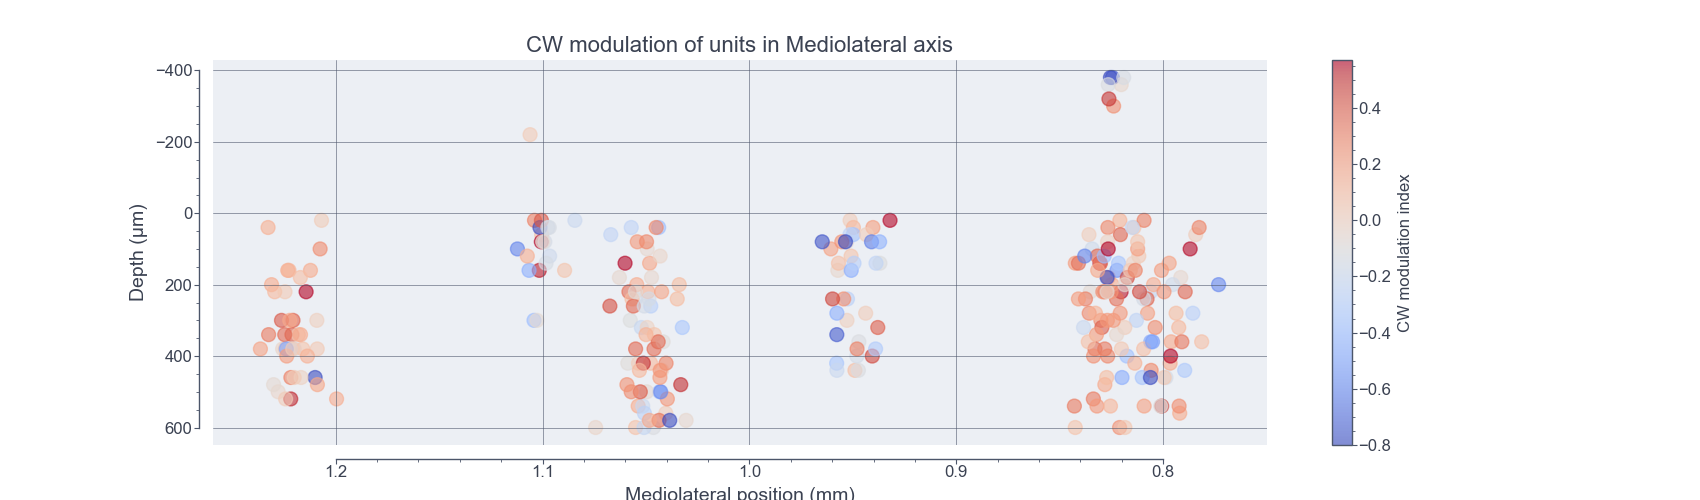

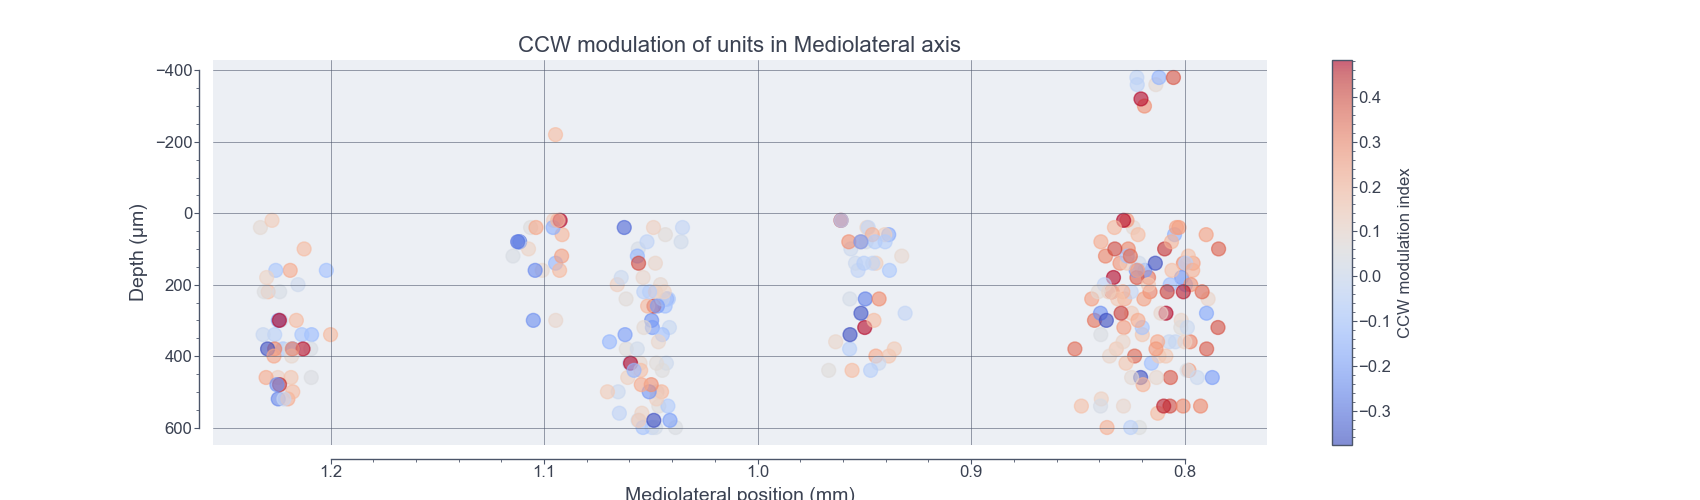

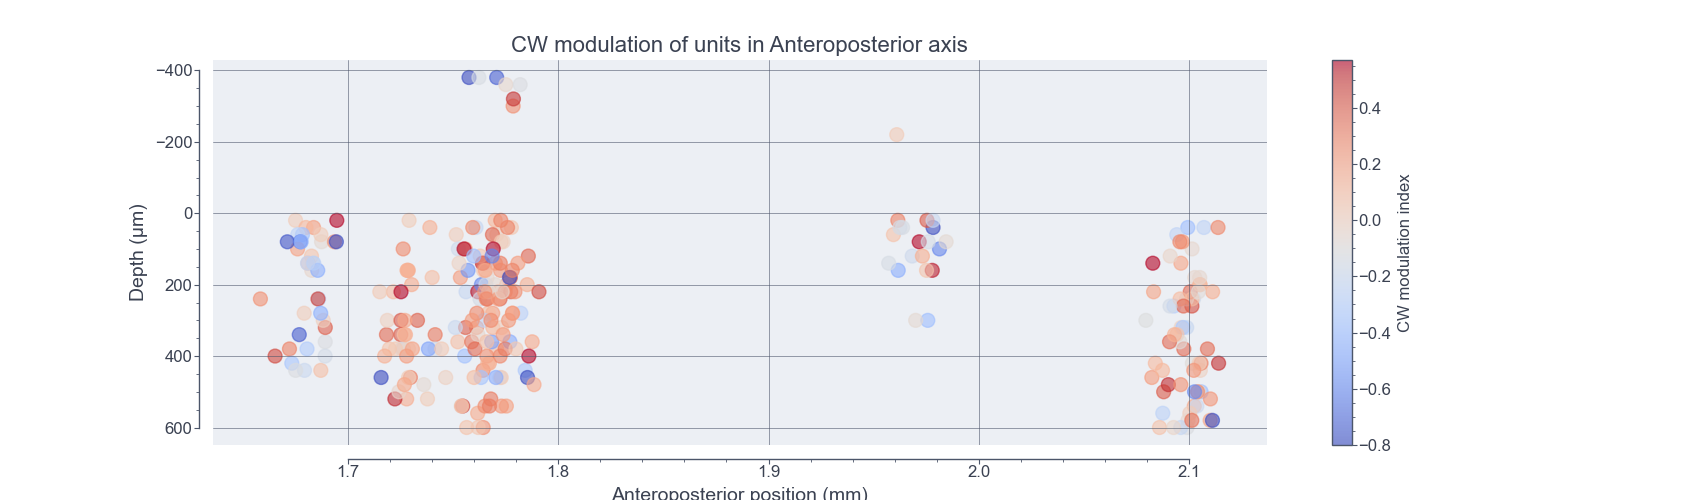

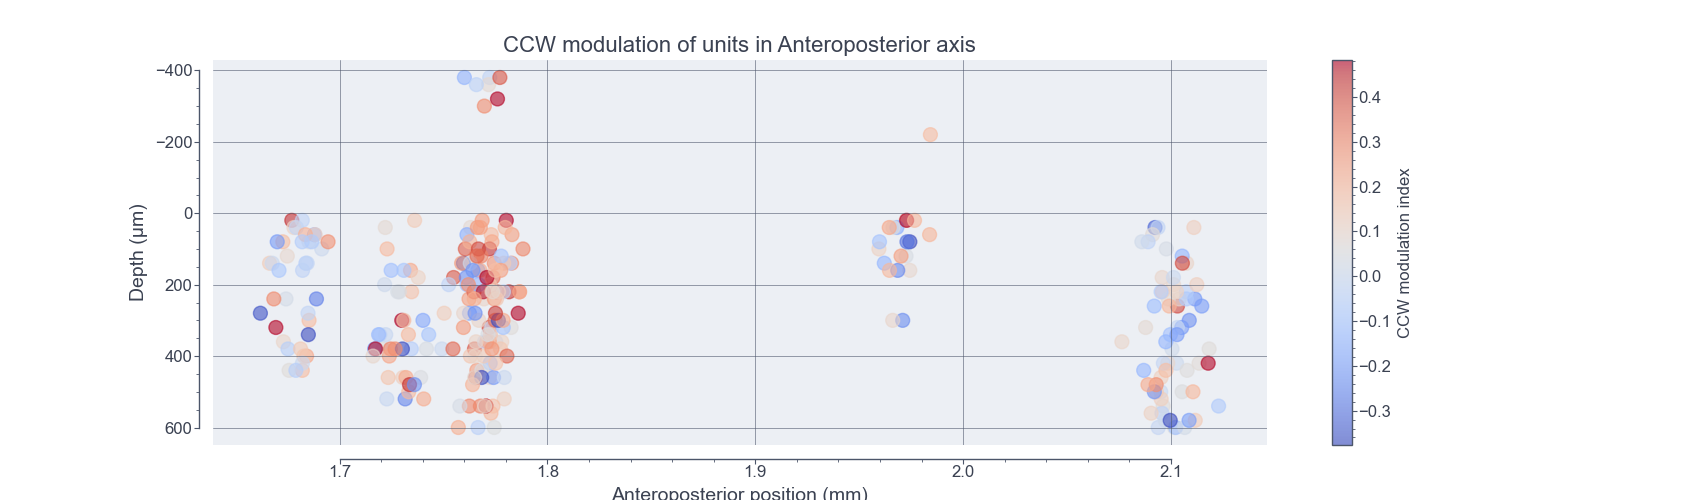

In [12]:
vMI_function(AllData, analyse_path, save=True, s=100, alpha=0.6)

## dirMI

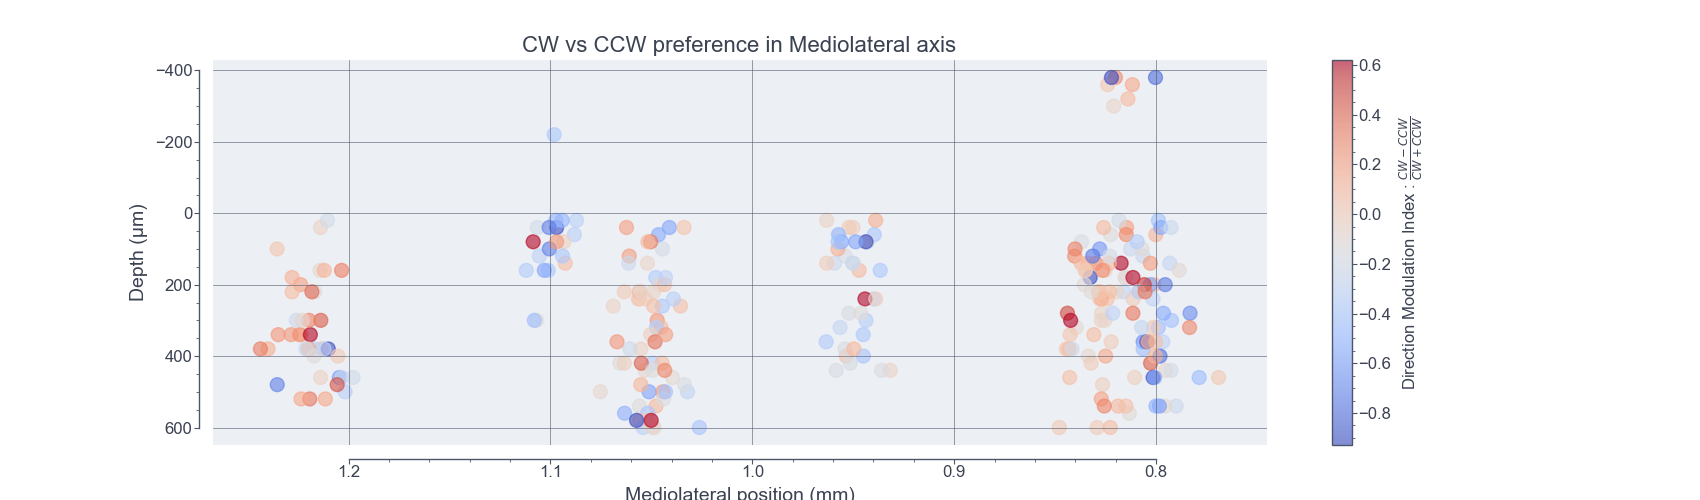

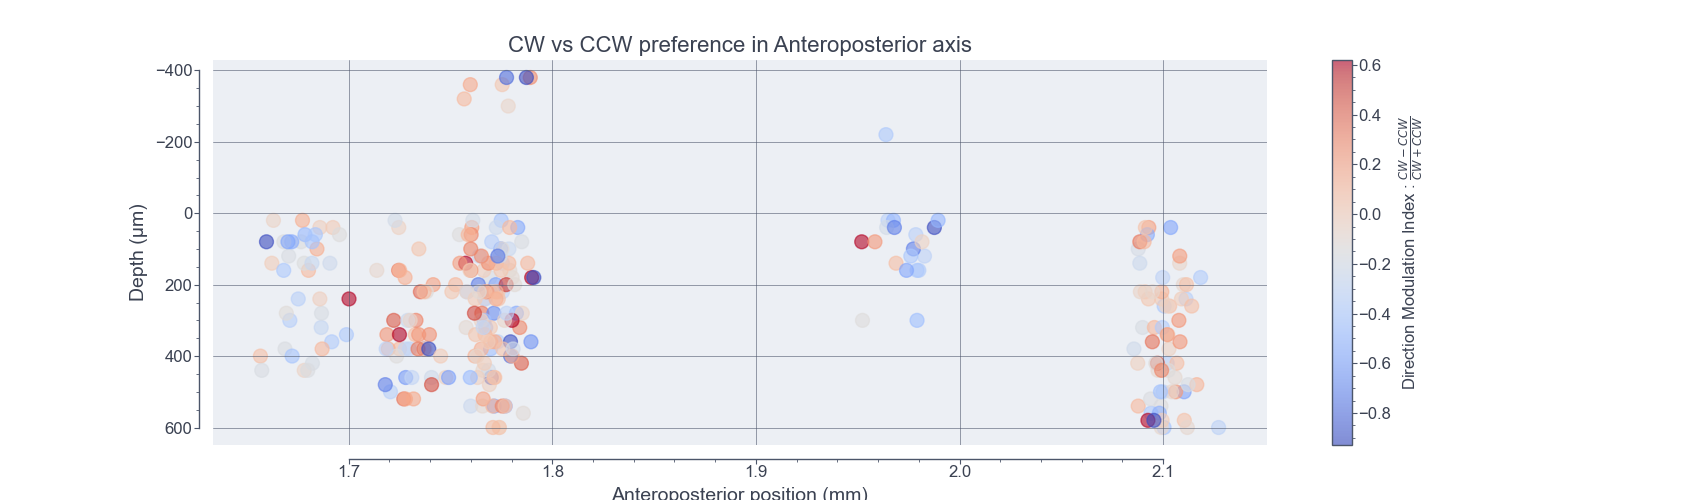

In [13]:
dirMI_function(AllData, analyse_path, save=True, s=100, alpha=0.6, scale=0.009)

## 3D Scatter

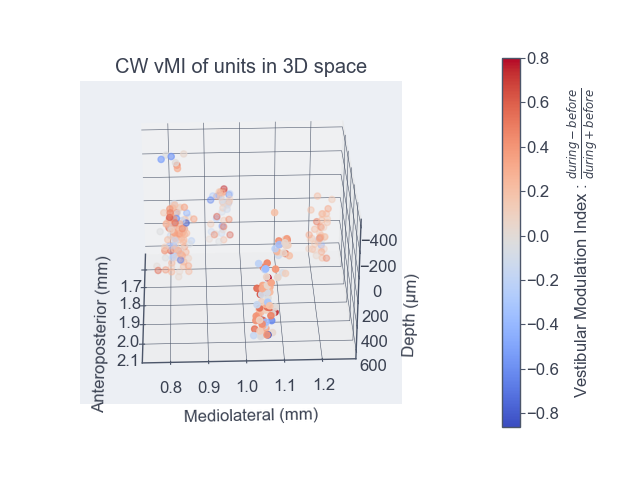

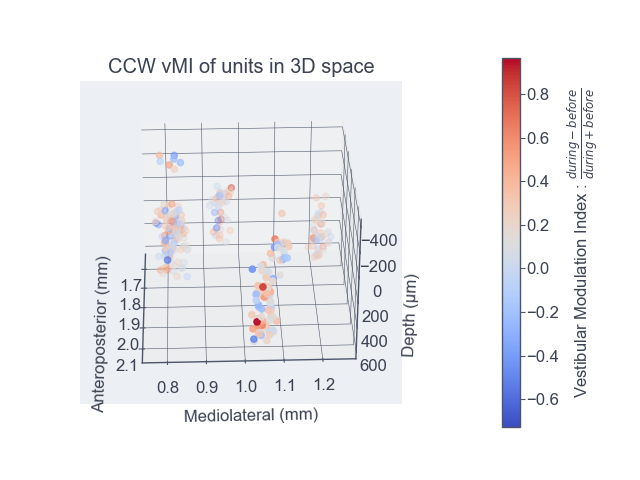

In [14]:
for direction in ['CW', 'CCW']:
    x = np.concatenate([np.random.normal(loc=AP_pos[animal], scale=0.015, size=(Nclust[animal], 1)) for animal in AP_pos])
    y = np.concatenate([np.random.normal(loc=ML_pos[animal], scale=0.015, size=(Nclust[animal], 1)) for animal in ML_pos])
    z = np.concatenate([AllDepth[animal] for animal in AllDepth])
    colors = np.concatenate([vMI[animal]['second'][direction] for animal in vMI])
    colorlabel = r'Vestibular Modulation Index : $\frac{during-before}{during+before}$'
    xlabel = 'Anteroposterior (mm)'
    ylabel = 'Mediolateral (mm)'
    zlabel = 'Depth (µm)'
    title = f"{direction} vMI of units in 3D space"
    filename = f"3D_{direction}_vMI.gif"
    filepath = os.path.join(analyse_path, '3Dmodulation')
    save=True
    show=True


    scatter3D(x,y,z,colors,colorlabel,xlabel,ylabel,zlabel,title,filename,filepath)

## Projected Scatter

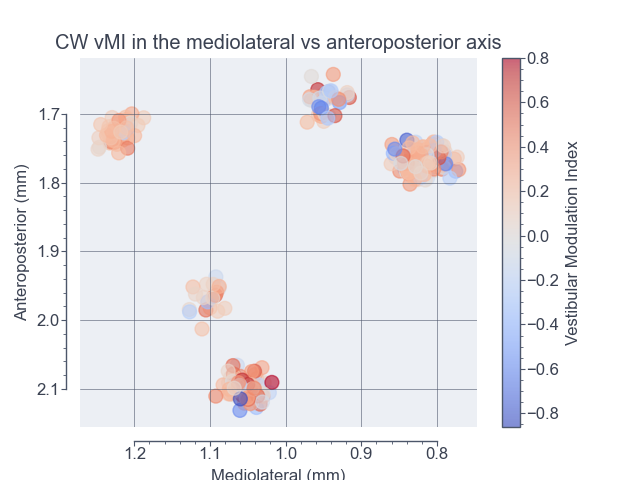

In [15]:
x = np.concatenate([np.random.normal(loc=ML_pos[animal], scale=0.015, size=(Nclust[animal], 1)) for animal in ML_pos])
y = np.concatenate([np.random.normal(loc=AP_pos[animal], scale=0.015, size=(Nclust[animal], 1)) for animal in AP_pos])
colors = np.concatenate([vMI[animal]['second']['CW'] for animal in vMI])

with load_theme('arctic_light') as theme:
    plt.figure()
    # Initialiser le graphique de dispersion 3D
    plt.scatter(x, y, c=colors, cmap='coolwarm', marker='o', alpha=0.6, s=100)

    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.ylabel('Anteroposterior (mm)')
    plt.xlabel('Mediolateral (mm)')

    plt.title('CW vMI in the mediolateral vs anteroposterior axis')

plt.colorbar(label='Vestibular Modulation Index')

# Afficher l'animation
plt.show()


## Test

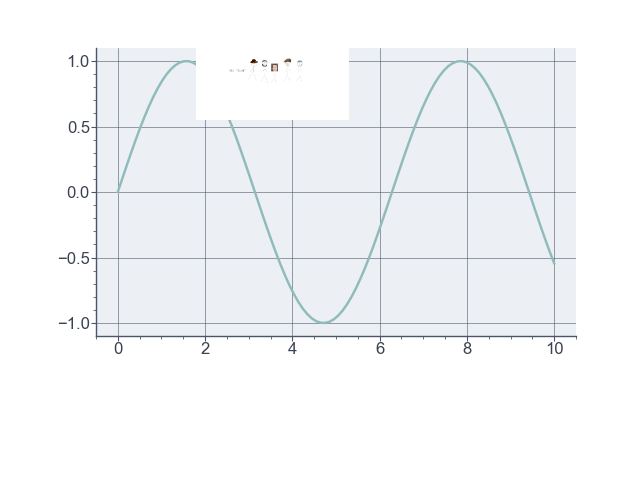

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Créer des données pour le graphique
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Créer une figure et des axes pour le graphique principal
fig, ax_main = plt.subplots()

# Ajouter le graphique principal
ax_main.plot(x, y)

# Créer des axes pour l'image
left, width = 0.1, 0.65
bottom, height = 0.75, 0.2
spacing = 0.005  # Espace entre le graphique principal et l'image
rect_image = [left, bottom, width, height]
ax_image = fig.add_axes(rect_image)

# Charger l'image et l'afficher
image_path = r'C:\Users\ayazici\Documents\Analyses\Vestibular_experiments\gb_power.png'
image = plt.imread(image_path)
ax_image.imshow(image)
ax_image.axis('off')  # Désactiver les axes pour l'image

# Ajuster les marges pour que le graphique principal et l'image ne se superposent pas
plt.subplots_adjust(left=0.15, right=0.9, top=0.9, bottom=0.3)

plt.show()


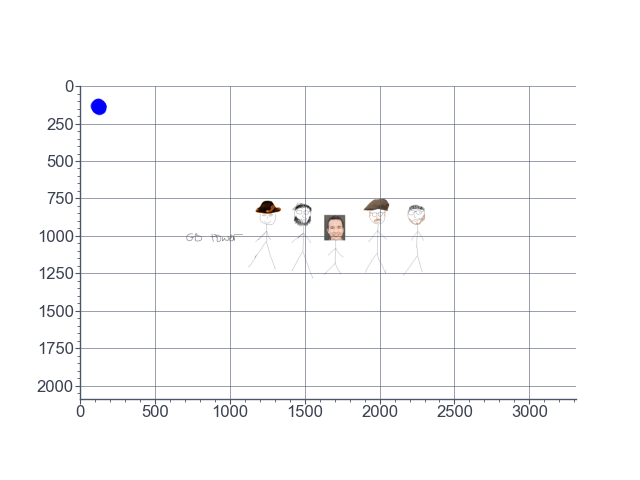

In [17]:
import matplotlib.patches as patches

# Charger l'image du cerveau
brain_img = plt.imread(os.path.join(analyse_path, 'gb_power.png'))

with load_theme("arctic_light"):
    # Créer une figure et un axe
    fig, ax = plt.subplots()

    # Afficher l'image du cerveau
    ax.imshow(brain_img)

    # Définir les coordonnées et les dimensions du rectangle
    rectangle_position = (100, 100)  # Position du coin supérieur gauche
    rectangle_width = 50
    rectangle_height = 70

    # Ajouter le rectangle à l'image
    rect = patches.Rectangle(rectangle_position, rectangle_width, rectangle_height,
                            linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Créer des données pour le scatter plot (simuler le grossissement)
    # Par exemple, des données aléatoires
    x = np.random.normal(rectangle_position[0] + rectangle_width / 2, 10, 100)
    y = np.random.normal(rectangle_position[1] + rectangle_height / 2, 10, 100)

    # Afficher le scatter plot avec des données simulées
    ax.scatter(x, y, color='b', alpha=0.5)

    # Afficher la figure
    plt.show()


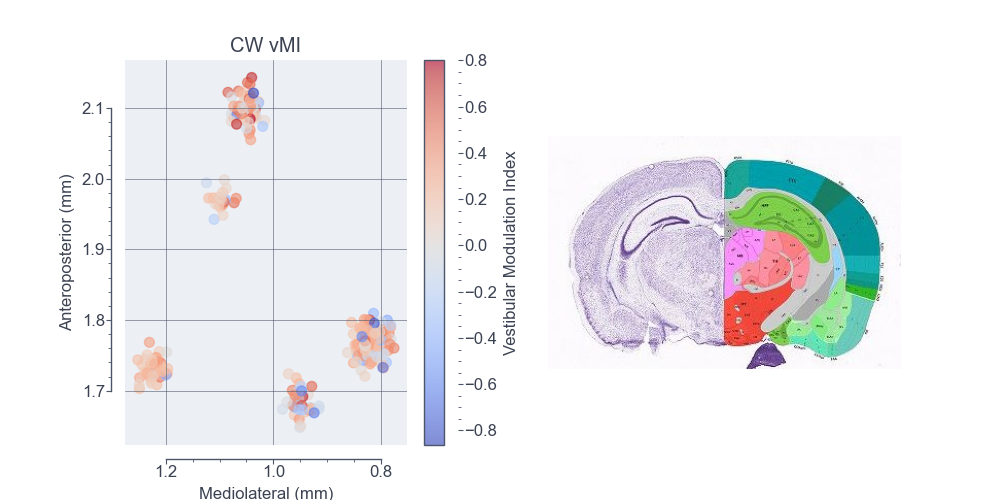

In [18]:



# Charger l'image avec Pillow
img = Image.open(os.path.join(analyse_path, 'brain.jpeg'))

with load_theme("arctic_light"):
    # Créer une nouvelle figure
    fig = plt.figure(figsize=(10, 5))
    gs = GridSpec(nrows=1, ncols=2)

    ax1 = fig.add_subplot(gs[0,1])
    # Afficher l'image sans les axes
    ax1.axis('off')
    ax1.imshow(img)














    ax2 = fig.add_subplot(gs[0,0])
    x = np.concatenate([np.random.normal(loc=ML_pos[animal], scale=0.015, size=(Nclust[animal], 1)) for animal in ML_pos])
    y = np.concatenate([np.random.normal(loc=AP_pos[animal], scale=0.015, size=(Nclust[animal], 1)) for animal in AP_pos])
    colors = np.concatenate([vMI[animal]['second']['CW'] for animal in vMI])


    # Initialiser le graphique de dispersion 3D
    im1 = ax2.scatter(x, y, c=colors, cmap='coolwarm', marker='o', alpha=0.6, s=50)

    fig.colorbar(im1, ax=ax2, label='Vestibular Modulation Index')

    #plt.gca().invert_xaxis()
    ax2.set_ylabel('Anteroposterior (mm)')
    ax2.set_xlabel('Mediolateral (mm)')

    ax2.set_title('CW vMI')
    ax2.invert_xaxis()

# Afficher la figure
plt.show()


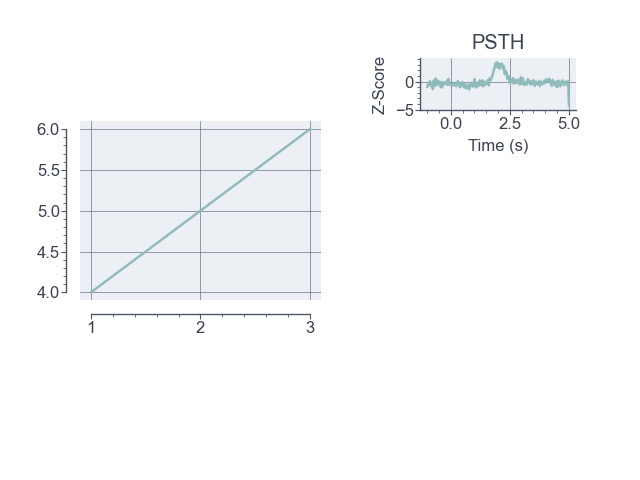

In [19]:
with load_theme("arctic_light"):
    fig = plt.figure()

    gs = GridSpec(nrows=6, ncols=6)

    ax = fig.add_subplot(gs[1:4,0:3])
    ax.plot([1, 2, 3], [4, 5, 6])

ax3 = fig.add_subplot(gs[0,4:6])
PSTH(SpikeTimes['animal21_a53d1s1']['second']['CW'][0], xlabel='Time (s)', ylabel='Z-Score', title='PSTH', ax=ax3)
# Zscore, SEM, edges = get_Zscore(SpikeTimes['animal21_a53d1s1']['second']['CW'][0])
# ax3.plot(edges[:-1], Zscore)
# ax3.fill_between(edges[:-1], Zscore-SEM, Zscore+SEM, alpha=0.5)

plt.show()

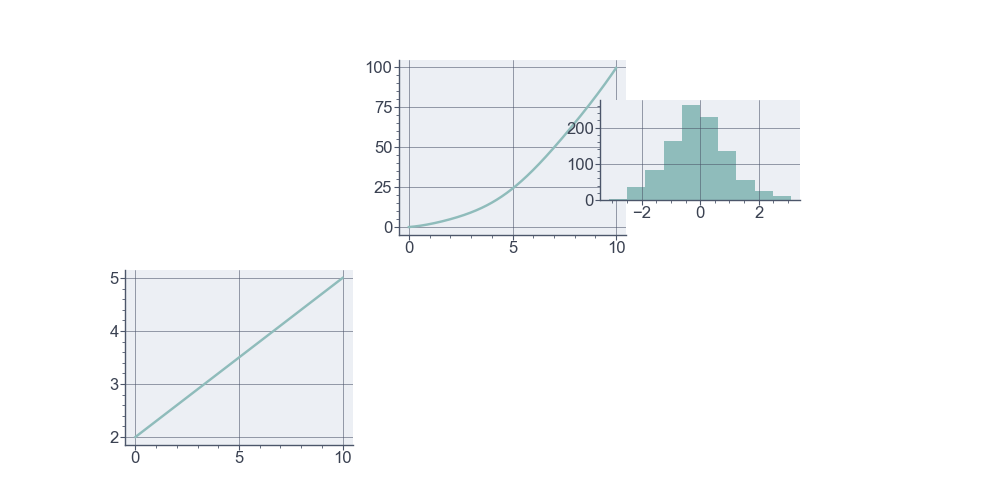

In [20]:


time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
score = time**2 + height
distribution = np.random.normal(0, 1, len(time))
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=3)

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(time, score)
ax3 = fig.add_axes([0.6, 0.6, 0.2, 0.2])
ax3.hist(distribution)
plt.show()

## vMI and dirMI in another way

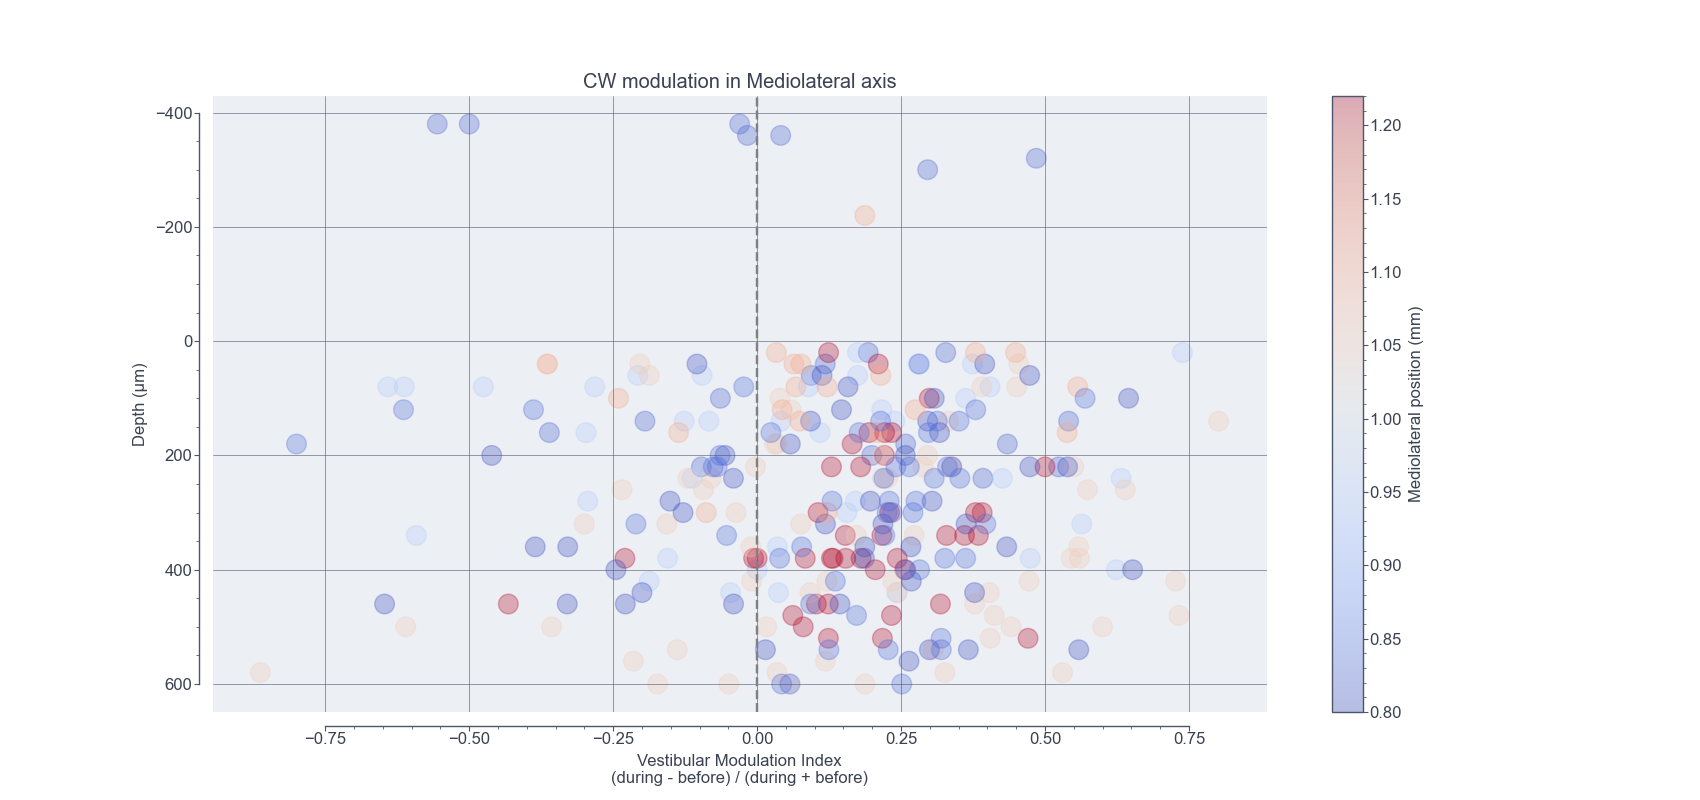

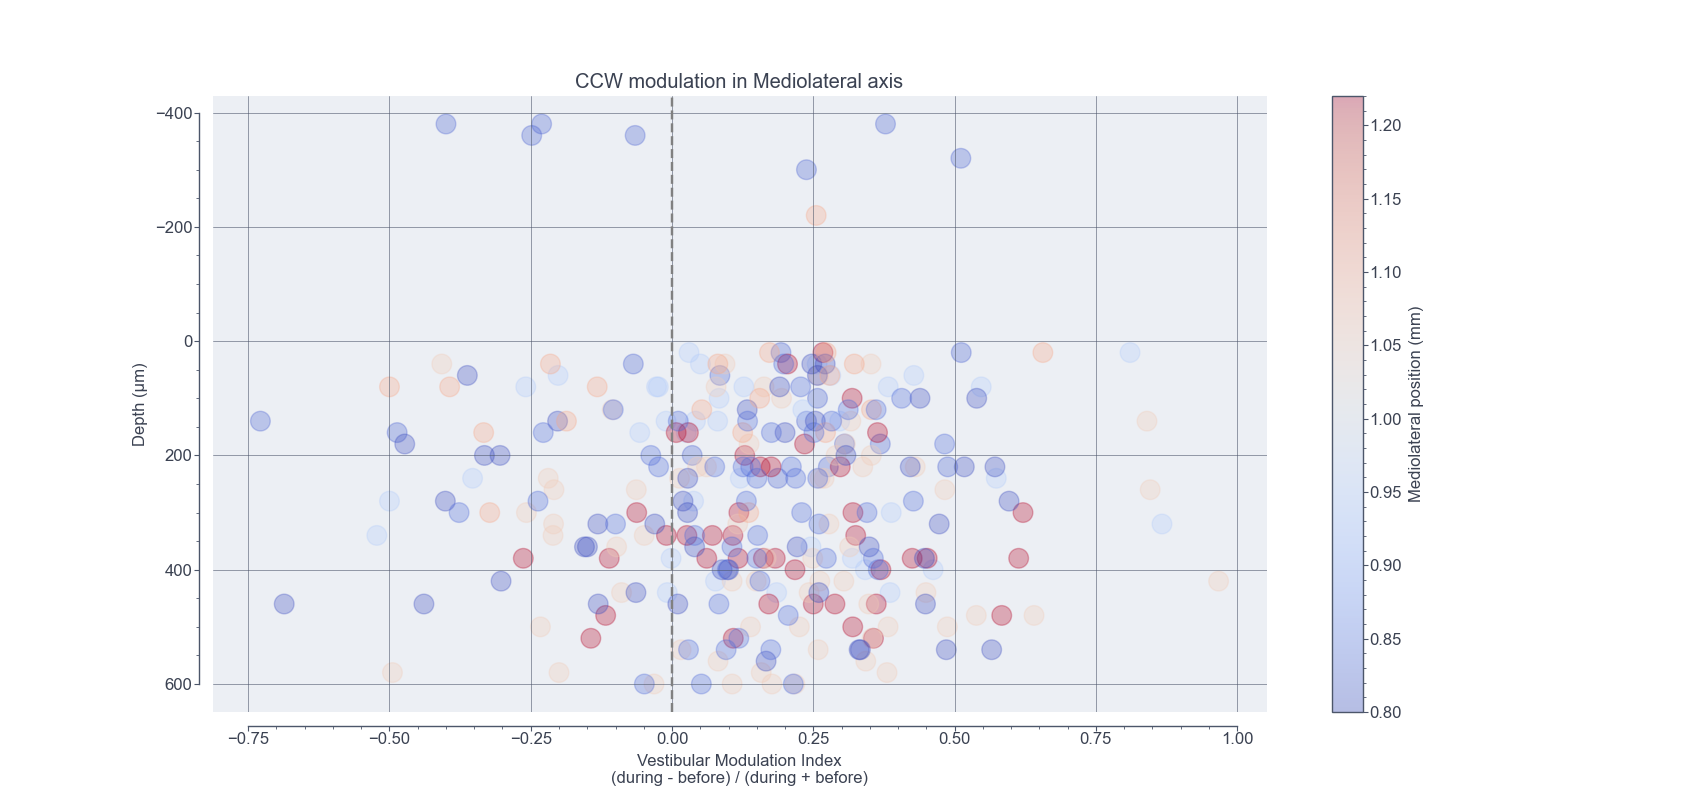

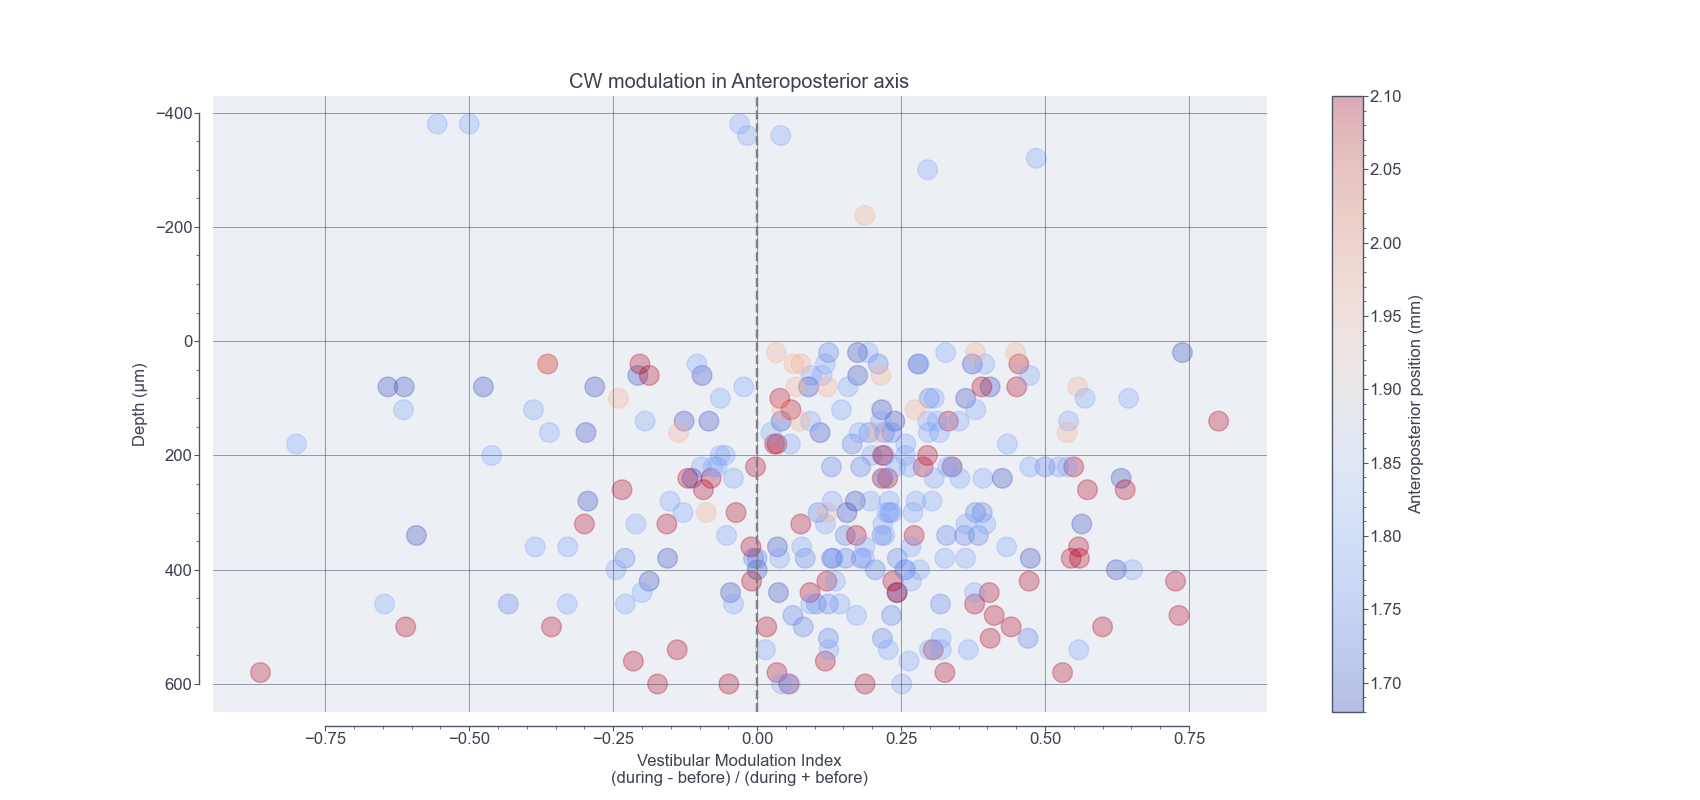

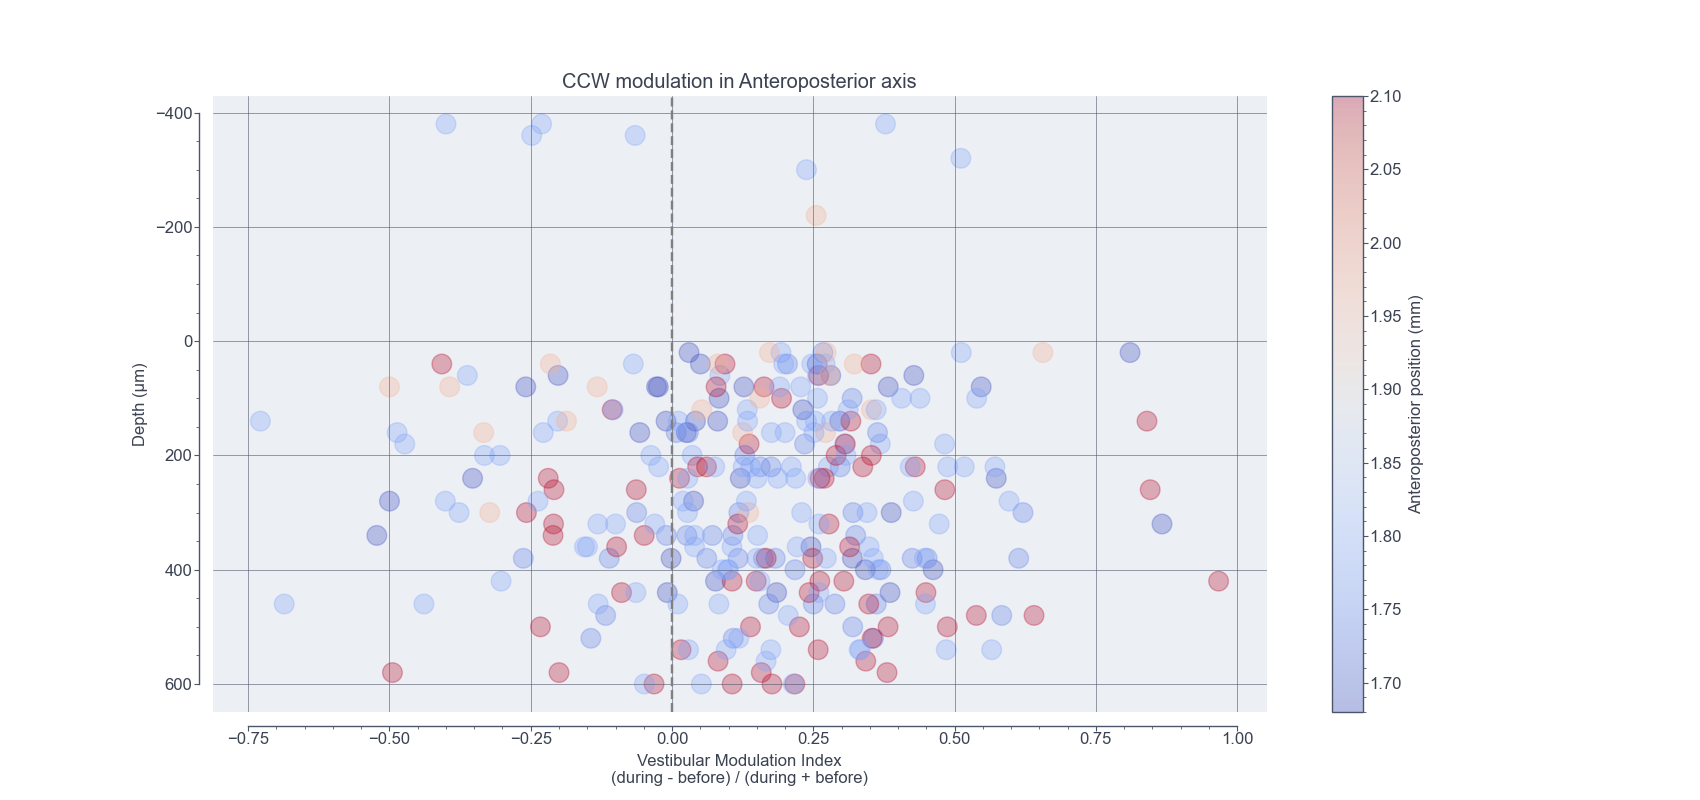

In [21]:
vMIplot = []
posplot = []
AllDepthplot = []

for pos_title, posOrientation in zip(['Mediolateral', 'Anteroposterior'], ['ML_pos', 'AP_pos']):
        for condition in ['second']:
            for direction in ['CW','CCW']:
                for animal in AllData:
                    vMIplot.extend(AllData[animal]['Statistics_data']['vMI'][condition][direction])
                    posplot.extend(AllData[animal]['informative_data'][posOrientation]*np.ones(len(AllData[animal]['Statistics_data']['vMI'][condition][direction])))
                    AllDepthplot.extend(AllData[animal]['MUA_data']['AllDepth'])
                
                with load_theme('arctic_light'):
                    plt.figure(figsize=(17, 8))

                    plt.gca().invert_yaxis()
                    plt.scatter(vMIplot, AllDepthplot, c=posplot, cmap='coolwarm', s=200, alpha=0.3)
                    plt.axvline(0, color='gray', linestyle='--')

                    plt.xlabel("Vestibular Modulation Index\n(during - before) / (during + before)")
                    plt.ylabel("Depth (µm)")
                    plt.title(f"{direction} modulation in {pos_title} axis")

                plt.colorbar(label=f"{pos_title} position (mm)")
                
                direction_modulation_folder_bis = os.path.join(analyse_path, 'Direction_modulation', 'bis')
                os.makedirs(direction_modulation_folder_bis, exist_ok=True)
                plt.savefig(os.path.join(direction_modulation_folder_bis , f"{direction}_modulation_{pos_title}.png"))

                plt.show()
                vMIplot = []
                posplot = []
                AllDepthplot = []

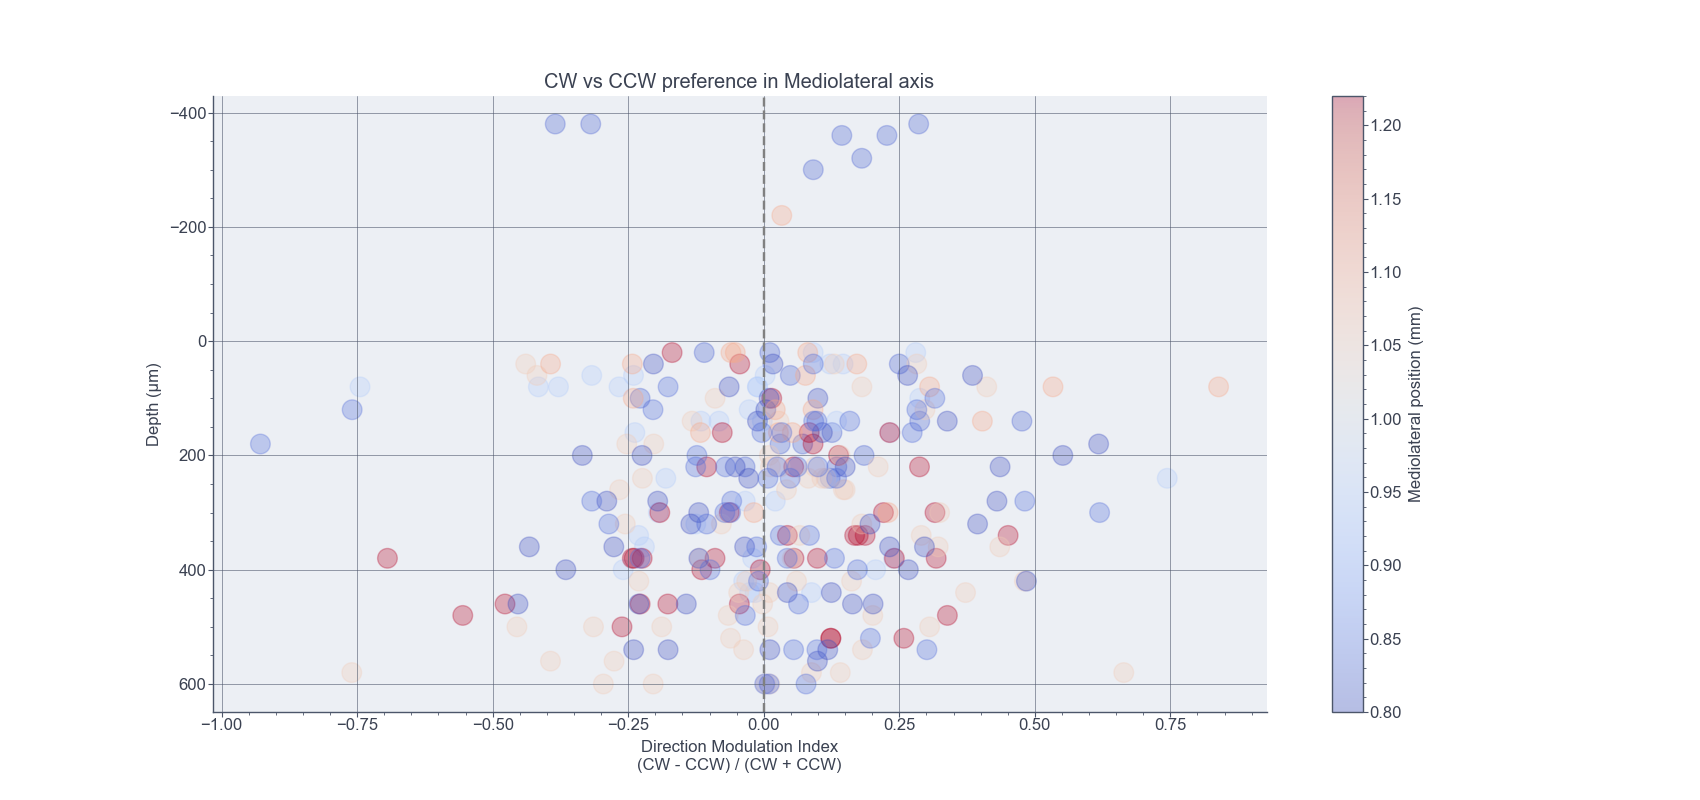

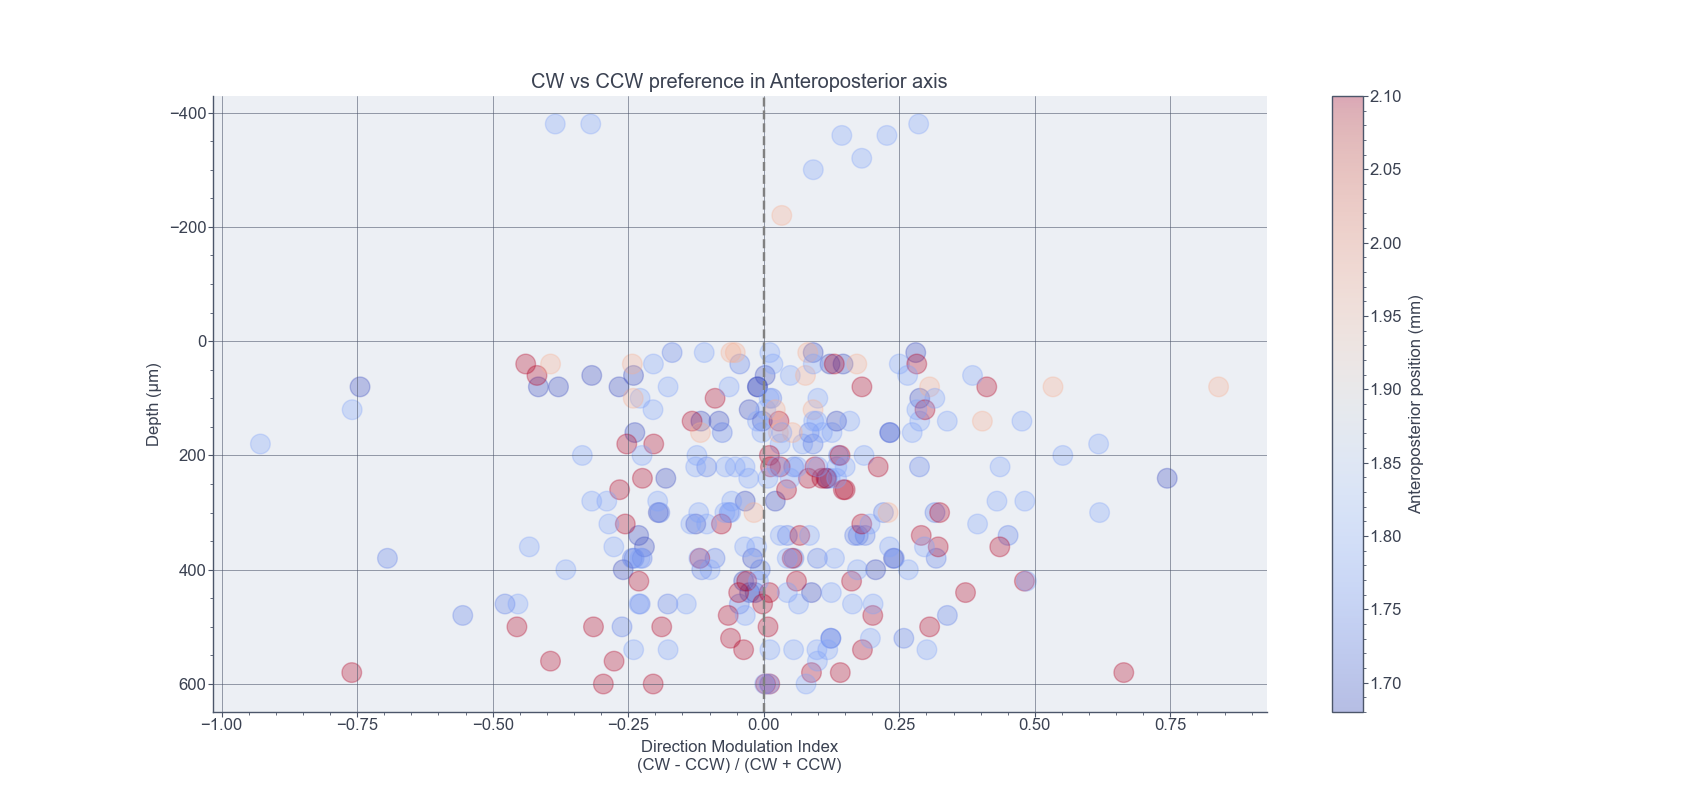

In [22]:
dirMIplot = []
posplot = []
AllDepthplot = []
mycm = ListedColormap(['blue', 'lawngreen', 'green', 'orange', 'purple', 'red', 'orchid', 'cyan', 'magenta'])

for pos_title, posOrientation in zip(['Mediolateral', 'Anteroposterior'], ['ML_pos', 'AP_pos']):
        for condition in ['second']:
            for animal in AllData:
                dirMIplot.extend(AllData[animal]['Statistics_data']['dirMI'][condition])
                posplot.extend(AllData[animal]['informative_data'][posOrientation]*np.ones(len(AllData[animal]['Statistics_data']['dirMI'][condition])))
                AllDepthplot.extend(AllData[animal]['MUA_data']['AllDepth'])
            
            plt.figure(figsize=(17, 8))

            plt.gca().invert_yaxis()
            plt.scatter(dirMIplot, AllDepthplot, c=posplot, cmap='coolwarm', s=200, alpha=0.3)
            plt.colorbar(label=f"{pos_title} position (mm)")
            plt.axvline(0, color='gray', linestyle='--')

            plt.xlabel("Direction Modulation Index\n(CW - CCW) / (CW + CCW)")
            plt.ylabel("Depth (µm)")
            plt.title(f"CW vs CCW preference in {pos_title} axis")

            direction_preference_folder_bis = os.path.join(analyse_path, 'Direction_preference', 'bis')
            os.makedirs(direction_preference_folder_bis, exist_ok=True)
            plt.savefig(os.path.join(direction_preference_folder_bis , f"{direction}_preference_{pos_title}.png"))

            plt.show()
            dirMIplot = []
            posplot = []
            AllDepthplot = []


Responding/Non-responding distribution

phototagged or not : [11, 269]
Phototagged neurons responding or not : [7, 4]
Modulation of phototagged neurons : [1, 2, 4]


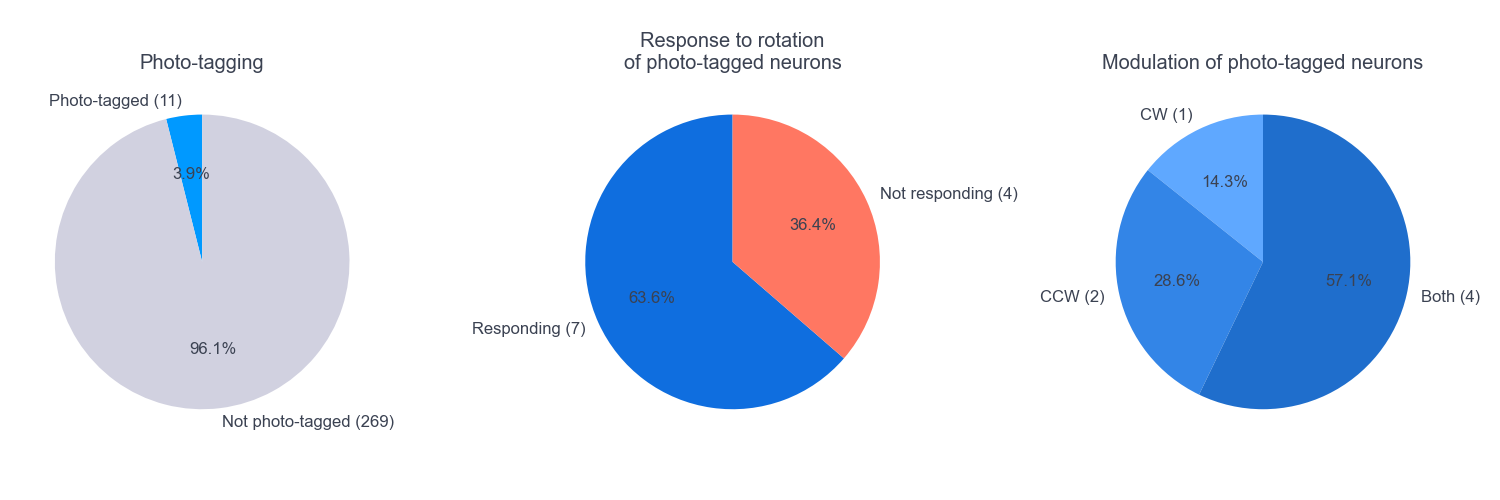

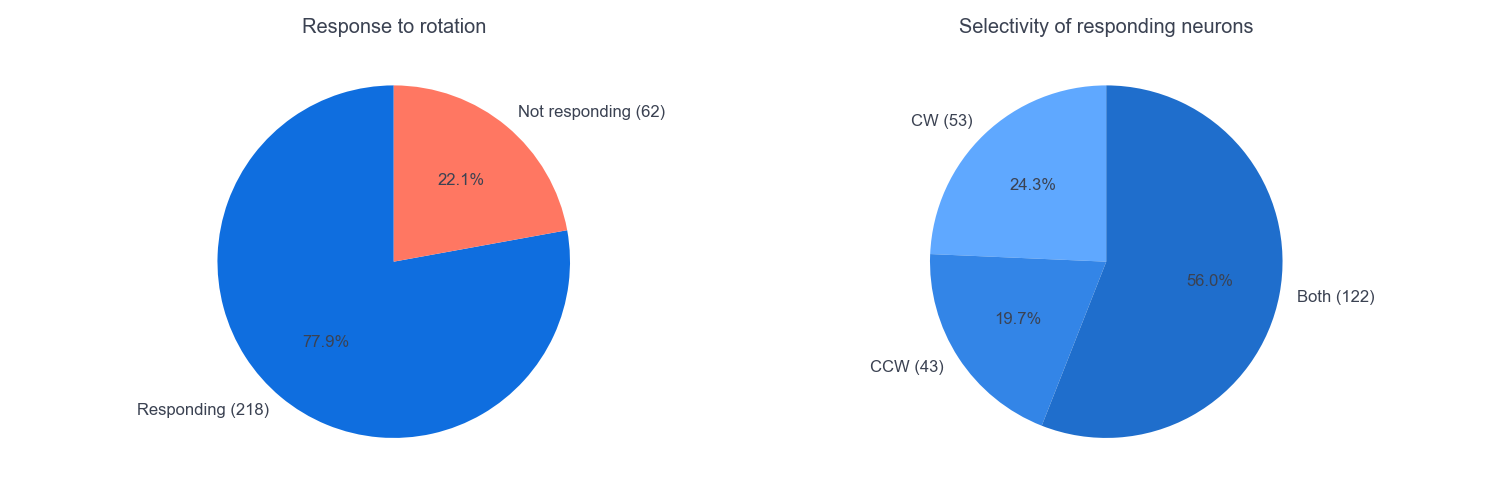

In [23]:
phototagged_ones = np.concatenate([modulation[animal]['first'] for animal in AllData])==1
both_ones = np.concatenate([[modulation[animal]['second'][neuron]['selectivity'] for neuron in range(Nclust[animal])] for animal in AllData])=='both'
CW_ones = np.concatenate([[modulation[animal]['second'][neuron]['selectivity'] for neuron in range(Nclust[animal])] for animal in AllData])=='CW'
CCW_ones = np.concatenate([[modulation[animal]['second'][neuron]['selectivity'] for neuron in range(Nclust[animal])] for animal in AllData])=='CCW'
unmodulated_ones = np.concatenate([[modulation[animal]['second'][neuron]['selectivity'] for neuron in range(Nclust[animal])] for animal in AllData])=='unmodulated'

for condition in ['first']:
    phototagged = len(np.where(phototagged_ones)[0])
    photo_respBOTH = len(np.where((phototagged_ones) & (both_ones))[0])
    photo_respCW = len(np.where((phototagged_ones) & (CW_ones))[0])
    photo_respCCW = len(np.where((phototagged_ones) & (CCW_ones))[0])
    photo_resp = photo_respBOTH + photo_respCCW + photo_respCW
    photo_notresp = len(np.where((phototagged_ones) & (unmodulated_ones))[0])

    non_phototagged = np.sum([Nclust[animal] for animal in Nclust]) - phototagged

    plt.rcParams.update({
        "text.usetex": False,
        # "font.family": "Helvetica"
    })

    if photo_resp != 0:
        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1)

        labels = ['Photo-tagged', 'Not photo-tagged']
        valeurs = [phototagged, non_phototagged]
        print(f"phototagged or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0099ff', '#d1d1e0'])
        plt.title('Photo-tagging')


        plt.subplot(1,3,2)
        labels = ['Responding', 'Not responding']
        valeurs = [photo_resp, photo_notresp]
        print(f"Phototagged neurons responding or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0F6EDF', '#FF7762'])
        plt.title('Response to rotation\nof photo-tagged neurons')


        plt.subplot(1,3,3)
        labels = ['CW', 'CCW', 'Both']
        valeurs = [photo_respCW, photo_respCCW, photo_respBOTH]
        print(f"Modulation of phototagged neurons : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#5FA8FF', '#3385E7', '#1F6ECC'])
        plt.title('Modulation of photo-tagged neurons')

        plt.tight_layout()

        # if Saving_boolean:
        #     os.makedirs(os.path.join(saving_folder, 'Distribution'), exist_ok=True)
        #     plt.savefig(os.path.join(saving_folder, 'Distribution', f"Distribution_{exp_id}_phototagging.png"))

        plt.show()
        print("\n")
    elif phototagged != 0:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)

        labels = ['Photo-tagged', 'Not photo-tagged']
        valeurs = [phototagged, non_phototagged]
        print(f"phototagged or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0099ff', '#d1d1e0'])
        plt.title('Photo-tagging')


        plt.subplot(1,2,2)
        labels = ['Responding', 'Not responding']
        valeurs = [photo_resp, photo_notresp]
        print(f"Phototagged neurons responding or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0F6EDF', '#FF7762'])
        plt.title('Response to rotation\nof photo-tagged neurons')

        plt.tight_layout()

        # if Saving_boolean:
        #     os.makedirs(os.path.join(saving_folder, 'Distribution'), exist_ok=True)
        #     plt.savefig(os.path.join(saving_folder, 'Distribution', f"Distribution_{exp_id}_phototagging.png"))

        plt.show()
        print("\n")
    else:
        plt.figure(figsize=(15,5))

        labels = ['Photo-tagged', 'Not photo-tagged']
        valeurs = [phototagged, non_phototagged]
        print(f"phototagged or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0099ff', '#d1d1e0'])
        plt.title('Photo-tagging')

        # if Saving_boolean:
        #     os.makedirs(os.path.join(saving_folder, 'Distribution'), exist_ok=True)
        #     plt.savefig(os.path.join(saving_folder, 'Distribution', f"Distribution_{exp_id}_phototagging.png"))

        plt.show()
        print("\n")








for condition in ['second']:
    CWmod = np.count_nonzero(np.concatenate([[modulation[animal][condition][neuron]['selectivity'] == 'CW' for neuron in range(Nclust[animal])] for animal in AllData]))
    CCWmod = np.count_nonzero(np.concatenate([[modulation[animal][condition][neuron]['selectivity'] == 'CCW' for neuron in range(Nclust[animal])] for animal in AllData]))
    BOTHmod = np.count_nonzero(np.concatenate([[modulation[animal][condition][neuron]['selectivity'] == 'both' for neuron in range(Nclust[animal])] for animal in AllData]))
    resp_units = CWmod + CCWmod + BOTHmod
    nonresp_units = np.sum([Nclust[animal] for animal in Nclust]) - resp_units


    labels = ['Responding', 'Not responding']
    valeurs = [resp_units, nonresp_units]

    plt.rcParams.update({
        "text.usetex": False,
        # "font.family": "Helvetica"
    })

    if resp_units != 0:
        plt.figure(figsize=(15,5))
        plt.subplot(1, 2, 1)
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0F6EDF', '#FF7762'])
        plt.title('Response to rotation')



        labels_selectivite = ['CW', 'CCW', 'Both']
        valeurs_selectivite = [CWmod, CCWmod, BOTHmod]

        print("\n")
        plt.subplot(1, 2, 2)
        plt.pie(valeurs_selectivite, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels_selectivite, valeurs_selectivite)], autopct='%1.1f%%', startangle=90, colors=['#5FA8FF', '#3385E7', '#1F6ECC'])
        # plt.text(1,1, '', ha='center', va='center', fontsize=12, color='red')
        plt.title('Selectivity of responding neurons')

        plt.tight_layout()
    else:
        plt.figure(figsize=(15,5))
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0F6EDF', '#FF7762'])
        plt.title('Response to rotation')

    # plt.suptitle(f"{condition} condition", fontsize=16)

    # if Saving_boolean:
    #     os.makedirs(os.path.join(saving_folder, 'Distribution'), exist_ok=True)
    #     plt.savefig(os.path.join(saving_folder, 'Distribution', f"Distribution_{exp_id}_{condition}_condition.png"))
    
    plt.show()